In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [29]:
# Import Dataset from S3
bucket = 'medical-x'
data_key = 'transformed-data/run-1701030744917-part-r-00000'
data_location = 's3://{}/{}'.format(bucket, data_key)
insurance = pd.read_csv(data_location)

In [30]:
# Print the first 5 rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
# Get information about the fields
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4968 non-null   int64  
 1   sex       4968 non-null   int64  
 2   bmi       4968 non-null   float64
 3   children  4968 non-null   int64  
 4   smoker    4968 non-null   int64  
 5   region    4968 non-null   object 
 6   charges   4968 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 271.8+ KB


In [32]:
insurance.describe()

,age,sex,bmi,children,smoker,charges
count,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000
mean,38.782609,0.544485,30.638741,2.124195,0.167874,12915.595887
std,12.701013,0.498067,5.625163,1.710139,0.373792,11130.773178
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,28.000000,0.000000,26.600000,1.000000,0.000000,5438.749100
50%,39.000000,1.000000,30.210000,2.000000,0.000000,9432.925300
75%,49.000000,1.000000,34.210000,4.000000,0.000000,15057.395497
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [33]:
# View all the columns
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Data Visualisation

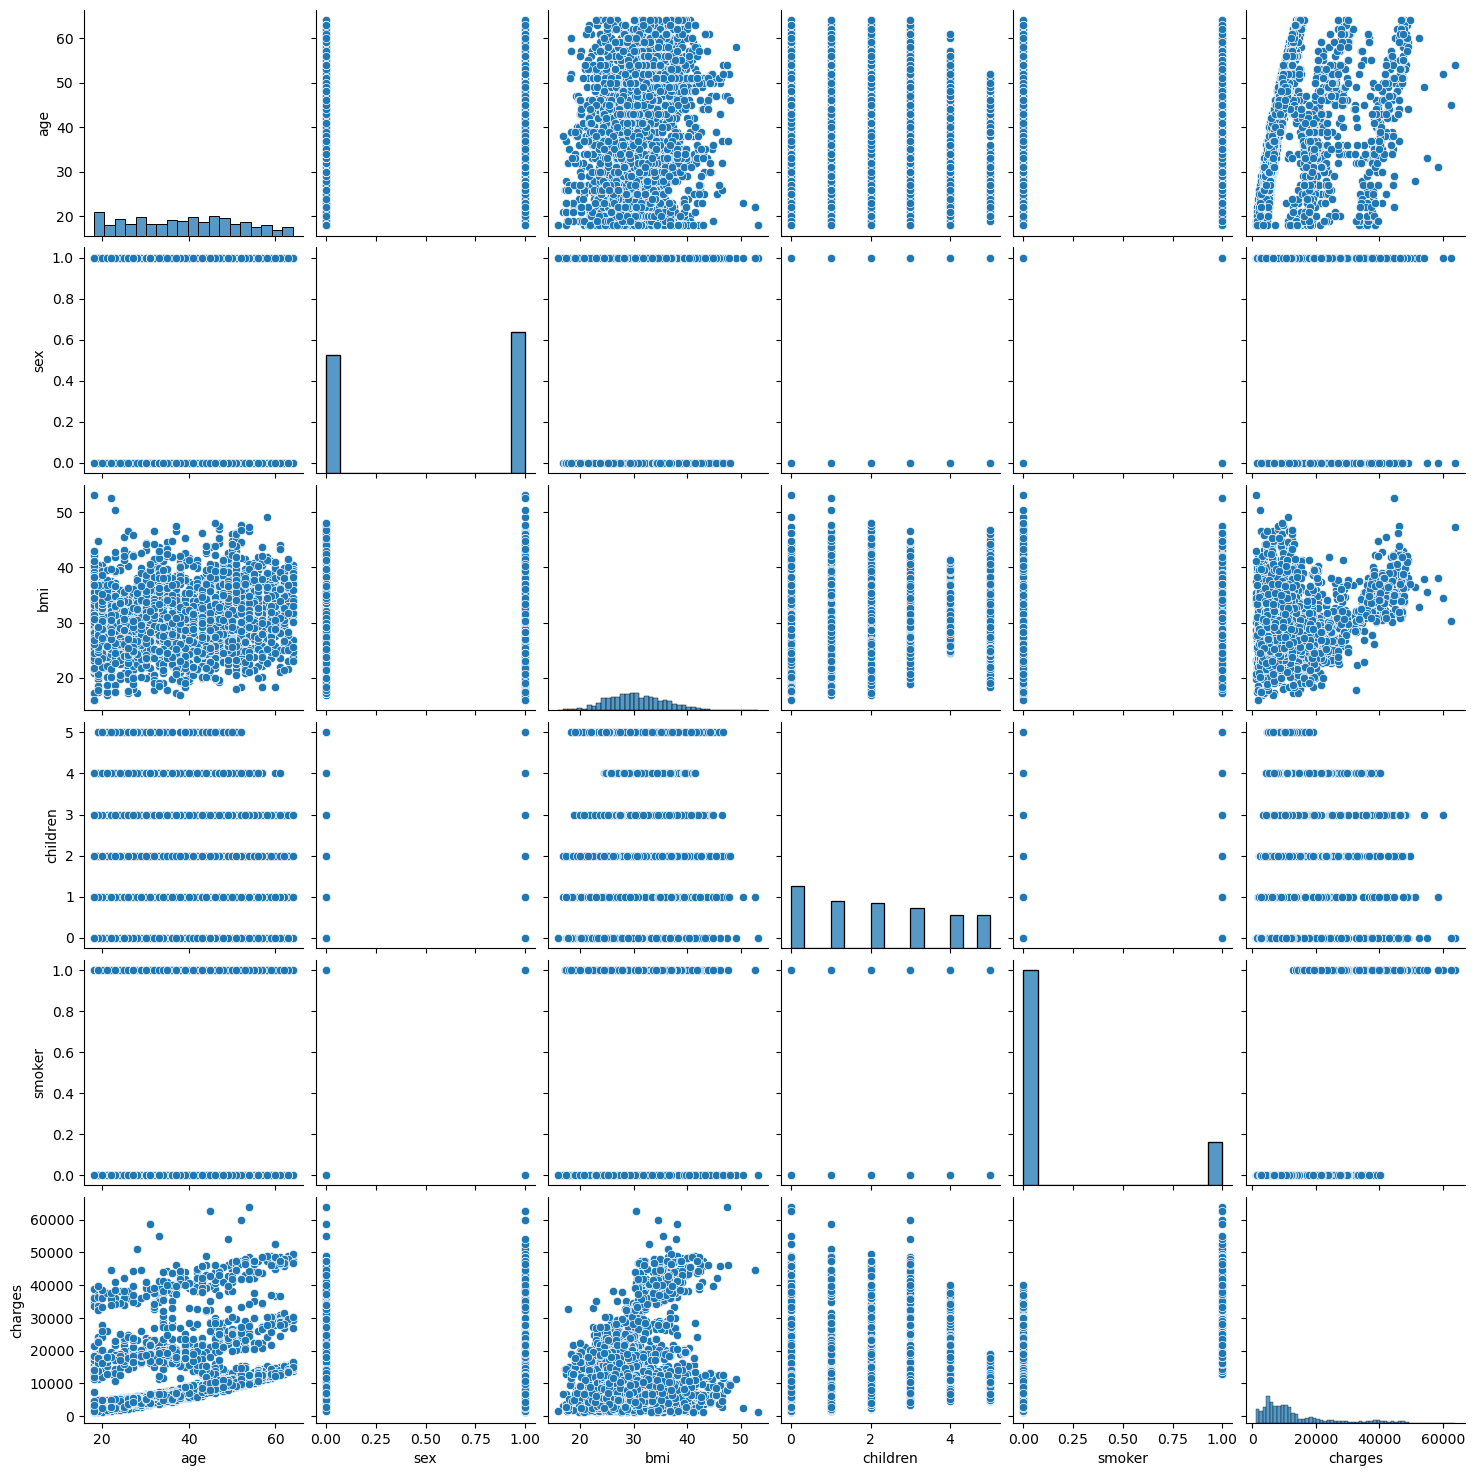

In [34]:
# pair plot
sns.pairplot(insurance)

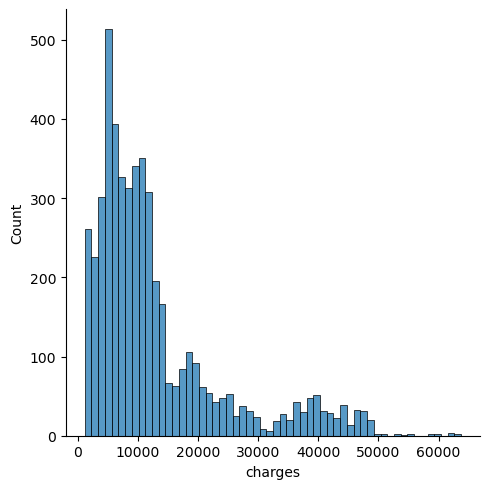

In [35]:
# view the distribution of charges
sns.displot(insurance['charges'])

In [36]:
# Convert categorical data into numerical ids
region_mapping = {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4}
insurance['region'] = insurance['region'].map(region_mapping)

<AxesSubplot:>

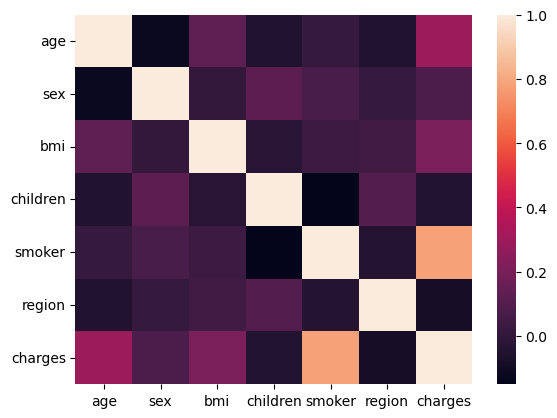

In [95]:
# plot heatmap
sns.heatmap(insurance.corr())

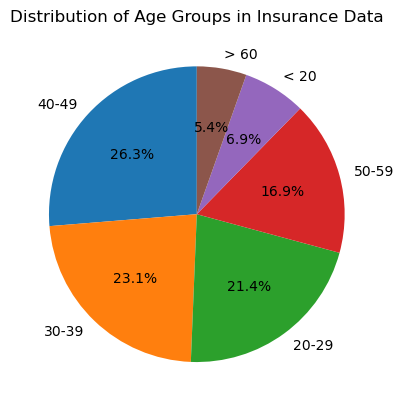

In [76]:
# Assuming 'age' is the column you want to categorize
bins = [0, 20, 30, 40, 50, 60, float('inf')]  # Note: Use float('inf') for the last bin to represent '> 60'
labels = ['< 20', '20-29', '30-39', '40-49', '50-59', '> 60']

# Create a new column 'age_group' with the specified age groups
insurance['age_group'] = pd.cut(insurance['age'], bins=bins, labels=labels, right=False)

# Get the counts of each age group
age_group_counts = insurance['age_group'].value_counts()

# Plotting the pie chart
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups in Insurance Data')
plt.show()

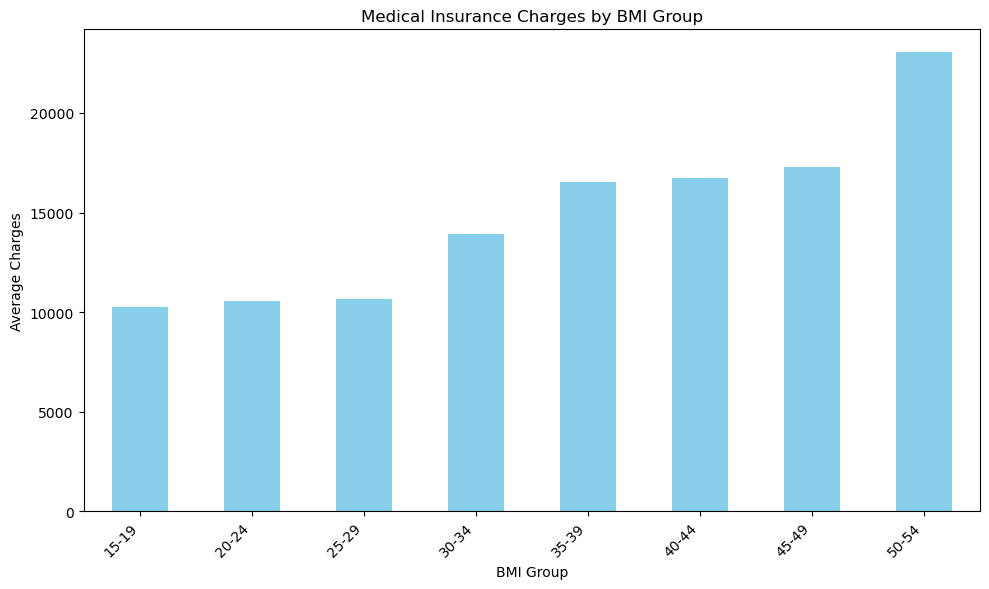

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df = insurance

# Assuming your CSV file has columns 'rating' and 'location'
# You can adjust column names accordingly if they are different

# Create BMI bins
bins = range(15, 60, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Group by BMI groups and calculate the mean charges
charges_by_bmi_group = df.groupby('bmi_group')['charges'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
charges_by_bmi_group.plot(kind='bar', color='skyblue')
plt.title('Medical Insurance Charges by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Charges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

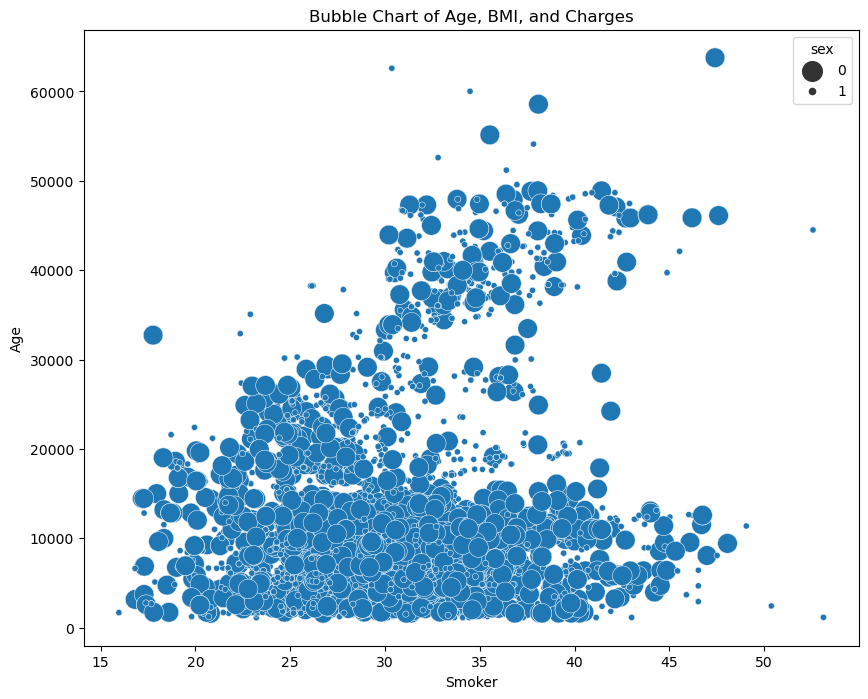

In [82]:
# Assuming 'age', 'bmi', and 'charges' are the columns you want to include
# X is the DataFrame containing the data
# y is the target variable ('charges')

# Create a scatter plot with 'age' on the x-axis, 'bmi' on the y-axis, and bubble size representing 'charges'
#plt.figure(figsize=(10, 8))
#sns.scatterplot(x='bmi', y='charges', size='sex', sizes=(20, 200), data=pd.concat([X, y], axis=1))

# Add labels and title
#plt.xlabel('Smoker')
#plt.ylabel('Age')
#plt.title('Bubble Chart of Age, BMI, and Charges')

# Show the plot
#plt.show()



# The scatter plot visualizes the relationship between 'age' and 'bmi' with bubbles whose sizes are determined by the 'charges' variable. 
# Larger bubbles represent higher 'charges'. The x-axis represents age, the y-axis represents BMI, and the size of each point provides information about the charges associated with that data point.

# Train the Model

In [38]:
# identify dependant and independant features
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance['charges']

In [39]:
# split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
# creating the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [41]:
# fit the train data
lm.fit(X_train,y_train)

LinearRegression()

# Model Summary

In [42]:
# print the intercept
print(lm.intercept_)

-10346.41315055469


In [43]:
# view how each feature contribute to the change in the dependant variable (label/predicting variable)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,239.017683
sex,1024.327880
bmi,313.567726
children,583.273582
smoker,23198.399815
region,-513.044031


# Prediction

In [44]:
# test with test data
predictions = lm.predict(X_test)

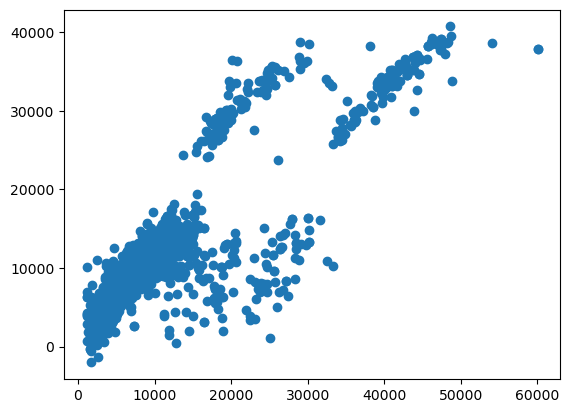

In [45]:
# scatter plot for the test results
plt.scatter(y_test,predictions)

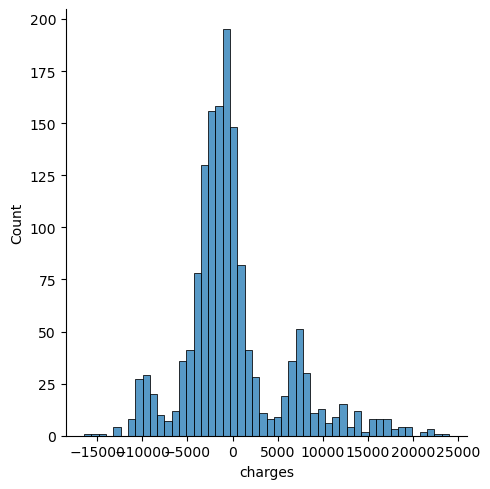

In [46]:
sns.displot((y_test-predictions),bins=50);

# Model Evaluation

In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3918.616778196135
MSE: 32073984.943250194
RMSE: 5663.3898809149805
